In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [52]:
# utility function
def write_answer(answer, file):
    with open(file, 'w') as f:
        f.write(str(answer))
        
def my_cv(model, X, y, file):
    score = cross_val_score(model, X, y, cv=10).mean()
    print(score)
    write_answer(score, file)

## Preparing *dataset* 

In [25]:
data = datasets.load_digits()
X = data.data
y = data.target

## 1st task

In [63]:
model = DecisionTreeClassifier()
my_cv(model, X, y, '1.txt')

0.8308131595282433


## 2nd task

In [64]:
bagging = BaggingClassifier(model, n_estimators=100)
my_cv(bagging, X, y, '2.txt')

0.9231688392302917


## 3rd task

In [71]:
bagging = BaggingClassifier(model, n_estimators=100, max_features = int(sqrt(X.shape[1])))
my_cv(bagging, X, y, '3.txt')

0.9298820608317815


## 4th task

In [72]:
model = DecisionTreeClassifier(max_features=int(sqrt(X.shape[1])))
bagging = BaggingClassifier(model, n_estimators=100)
my_cv(bagging, X, y, '4.txt')

0.9482402234636871


## 5th task

In [76]:
estimators = [5, 10, 15, 20, 25, 100]
forests = [RandomForestClassifier(n_estimators=i, n) for i in estimators]
scores = [cross_val_score(i, X, y, cv=10).mean() for i in forests]

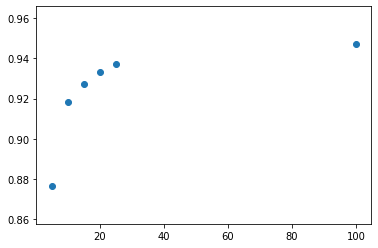

In [80]:
plt.scatter(estimators, scores)

In [82]:
forest_0 = RandomForestClassifier(n_estimators=5, max_features=10)
cross_val_score(forest_0, X, y, cv=10).mean()

0.8781564245810056